In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [2]:
from matplotlib import font_manager 
font_fname = 'C:\\Windows\\Fonts\\gulim.ttc' 
font_family = font_manager.FontProperties(fname=font_fname).get_name() 
plt.rcParams["font.family"] = font_family

In [3]:
carIDDF = pd.read_csv("car.csv")
carIDDF.head()

,Company,Car,CarNm,Size,Fuel,Fuel_Efficiency(km/ℓ),Avg_Fuel(km/ℓ),BasicPrice(만원),OptionPrice(만원),Price(만원)
0,쉐보레,수입,2021 쉐보레 스파크,경형,가솔린,14.4~15.0km/ℓ,14,977,1493,"977~1,493"
1,기아,국산,2021 모닝,경형,가솔린,15.7km/ℓ,15,1175,1480,"1,175~1,480"
2,기아,국산,2020 레이,경형,가솔린,12.7~13.0km/ℓ,12,1260,1570,"1,260~1,570"
3,현대,국산,2019 베뉴,소형,가솔린,13.3~13.7km/ℓ,13,1473,2111,"1,473~2,111"
4,기아,국산,2020 봉고3,중형,"디젤, LPG",6.5~9.9km/ℓ,8,1529,2219,"1,529~2,219"


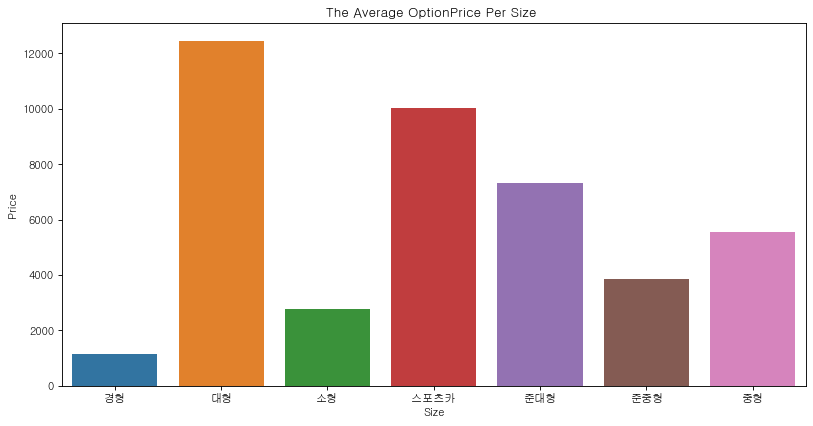

In [4]:
fig = plt.figure(figsize=(12,6), dpi=80)

ax = sns.barplot(x=carIDDF.groupby('Size').mean().index,
                 y=carIDDF.groupby('Size').mean()['BasicPrice(만원)'].values)


plt.xlabel('Size')
plt.ylabel('Price')
plt.title('The Average OptionPrice Per Size ')
plt.show()

In [5]:
carIDDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Company                193 non-null    object
 1   Car                    193 non-null    object
 2   CarNm                  193 non-null    object
 3   Size                   193 non-null    object
 4   Fuel                   193 non-null    object
 5   Fuel_Efficiency(km/ℓ)  193 non-null    object
 6   Avg_Fuel(km/ℓ)         193 non-null    int64 
 7   BasicPrice(만원)         193 non-null    int64 
 8   OptionPrice(만원)        193 non-null    int64 
 9   Price(만원)              193 non-null    object
dtypes: int64(3), object(7)
memory usage: 15.2+ KB


In [7]:
carIDDF.head()

,Company,Car,CarNm,Size,Fuel,Fuel_Efficiency(km/ℓ),Avg_Fuel(km/ℓ),BasicPrice(만원),OptionPrice(만원),Price(만원)
0,쉐보레,수입,2021 쉐보레 스파크,경형,가솔린,14.4~15.0km/ℓ,14,977,1493,"977~1,493"
1,기아,국산,2021 모닝,경형,가솔린,15.7km/ℓ,15,1175,1480,"1,175~1,480"
2,기아,국산,2020 레이,경형,가솔린,12.7~13.0km/ℓ,12,1260,1570,"1,260~1,570"
3,현대,국산,2019 베뉴,소형,가솔린,13.3~13.7km/ℓ,13,1473,2111,"1,473~2,111"
4,기아,국산,2020 봉고3,중형,"디젤, LPG",6.5~9.9km/ℓ,8,1529,2219,"1,529~2,219"


In [8]:
temp = pd.melt(carIDDF, 
        id_vars=["Company","Car","CarNm","Size"], 
        value_vars=["BasicPrice(만원)","OptionPrice(만원)"])
temp

,Company,Car,CarNm,Size,variable,value
0,쉐보레,수입,2021 쉐보레 스파크,경형,BasicPrice(만원),977
1,기아,국산,2021 모닝,경형,BasicPrice(만원),1175
2,기아,국산,2020 레이,경형,BasicPrice(만원),1260
3,현대,국산,2019 베뉴,소형,BasicPrice(만원),1473
4,기아,국산,2020 봉고3,중형,BasicPrice(만원),1529
...,...,...,...,...,...,...
381,랜드로버,수입,2020 랜드로버 레인지로버,대형,OptionPrice(만원),22577
382,벤츠,수입,2020 벤츠 G클래스 AMG,중형,OptionPrice(만원),24300
383,BMW,수입,2019 BMW i8 로드스터,스포츠카,OptionPrice(만원),22370
384,랜드로버,수입,2020 랜드로버 레인지로버 LWB,대형,OptionPrice(만원),31467


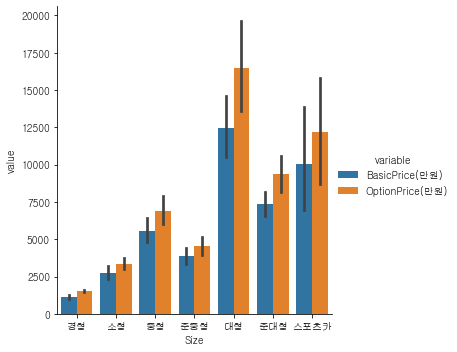

In [9]:
sns.catplot(x="Size", y="value", hue="variable", kind="bar", data=temp)